# air_visit_data.csvとdate_info.csvをjoinしたテーブルの分析

## 要約
- date_infoについて
    - 517 行 3列
    - holiday_flgが0のほうが圧倒的に多い
    - 各曜日の出現回数は74回、ただし木曜日のみ73回
    - 祝日は月曜が最も多い
---
- 金曜日と土曜日の来客数が多く、月曜日が少ない傾向にある
- 祝日と平日では祝日のほうが平均来客数が多い

In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
air_visit_date = pd.read_csv('../data/air_visit_data.csv',parse_dates=['visit_date'])
date_info = pd.read_csv('../data/date_info.csv',parse_dates=['calendar_date'])

In [3]:
date_info.dtypes

calendar_date    datetime64[ns]
day_of_week              object
holiday_flg               int64
dtype: object

### date_infoの基礎集計

In [4]:
date_info.describe(include='all')

,calendar_date,day_of_week,holiday_flg
count,517,517,517.000000
unique,517,7,NaN
top,2016-09-08 00:00:00,Sunday,NaN
freq,1,74,NaN
first,2016-01-01 00:00:00,NaN,NaN
last,2017-05-31 00:00:00,NaN,NaN
mean,NaN,NaN,0.067698
std,NaN,NaN,0.251471
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000


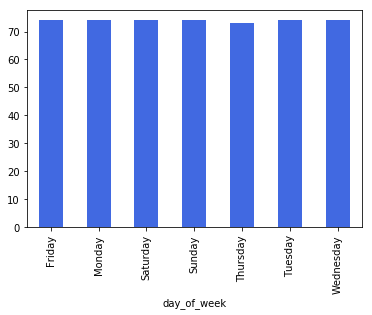

In [5]:
date_info.groupby('day_of_week')['holiday_flg'].count().plot.bar(color='royalblue')

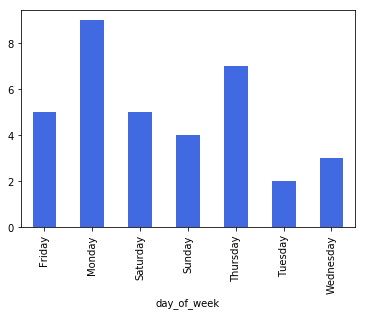

In [6]:
date_info.groupby('day_of_week')['holiday_flg'].sum().plot.bar(color='royalblue')

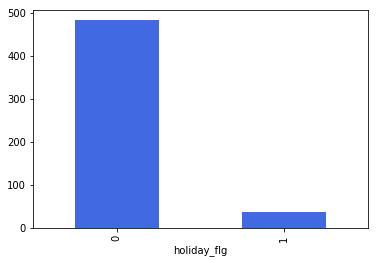

In [24]:
date_info.groupby('holiday_flg')['calendar_date'].count().plot.bar(color='royalblue')

### air_visit_dateとdate_infoをleft join

In [7]:
air_visit_date_with_info = pd.merge(air_visit_date, date_info, how='left', left_on='visit_date', right_on='calendar_date')
air_visit_date_with_info.drop(columns='calendar_date', axis=1, inplace=True)

#### 曜日ごとの来客数

In [13]:
air_visit_date_with_info.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0


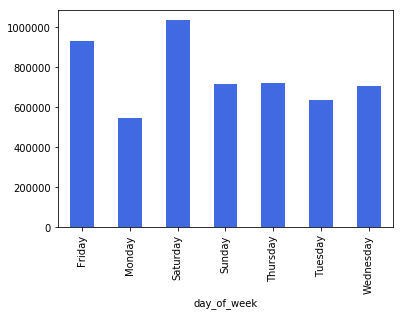

In [19]:
air_visit_date_with_info.groupby('day_of_week')['visitors'].sum().plot.bar(color='royalblue')

#### 祝日と平日の来客数

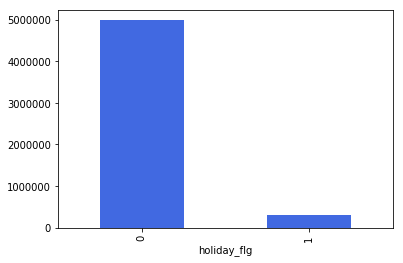

In [63]:
air_visit_date_with_info.groupby('holiday_flg')['visitors'].sum().plot.bar(color='royalblue')

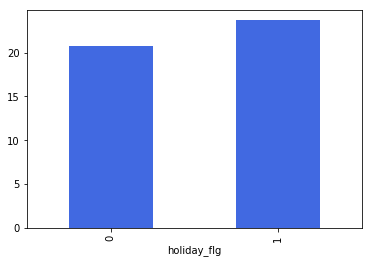

In [64]:
air_visit_date_with_info.groupby('holiday_flg')['visitors'].mean().plot.bar(color='royalblue')

#### 曜日ごとの来客数の推移

In [43]:
air_visit_date_with_info['year_month']=air_visit_date_with_info['visit_date'].dt.strftime('%Y-%m')
pv=pd.pivot_table(data=air_visit_date_with_info, values=['visitors'],
                    index=['year_month','day_of_week'],aggfunc='sum')

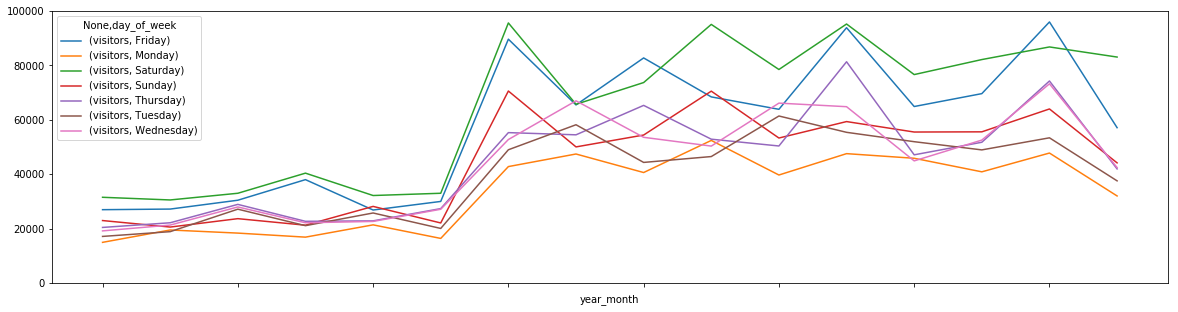

In [57]:
pv.unstack(level=1).plot(figsize=(20,5), ylim=(0, 100000))